In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import math
from statsmodels.tools import eval_measures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [ ]:
weather_data = pd.read_csv('finalproject_dataset.csv')

In [ ]:
weather_data.head(10)

,Unnamed: 0,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),...,WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
0,0,2011,5,2,2.80,0.00,0.0,0.0,16.65,10.00,...,8.30,6.471193,12.453704,0.000000,68.027778,30.221574,30.138621,9.993333,9.779693,6.472222
1,1,2011,5,3,3.60,0.00,0.0,0.0,22.80,11.95,...,9.80,10.305305,14.671717,0.000000,76.054545,30.069619,29.962545,9.831892,13.343434,8.954955
2,2,2011,5,4,3.85,1.27,0.0,0.0,17.50,8.05,...,10.95,9.202509,11.645646,7.717692,85.686486,29.954112,29.865938,7.322043,10.028935,9.274194
3,3,2011,5,5,5.25,0.00,0.0,0.0,17.75,8.05,...,14.30,1.293019,12.227096,0.338667,52.884956,29.922075,29.860833,9.634386,7.024482,11.842105
4,4,2011,5,6,3.80,0.00,0.0,0.0,21.40,10.55,...,11.40,3.405350,15.102881,0.000000,48.027778,29.926916,29.839661,9.993333,9.416196,9.092593
5,5,2011,5,7,3.20,0.00,0.0,0.0,21.65,13.05,...,13.20,6.253823,15.091743,0.830385,59.403670,29.840654,29.758276,9.736881,10.689655,7.688073
6,6,2011,5,8,2.55,0.00,0.0,0.0,22.75,11.40,...,8.70,6.254960,14.916926,0.000000,61.205607,29.877963,29.808833,9.535446,10.813492,8.312500
7,7,2011,5,9,4.15,0.00,0.0,0.0,20.85,12.50,...,12.10,4.458689,14.658869,0.404928,54.596491,29.913810,29.854667,9.392906,9.990584,13.646552
8,8,2011,5,10,3.40,0.00,0.0,0.0,23.05,12.25,...,10.50,5.333333,13.687739,0.000000,61.189655,29.954860,29.892500,8.912500,10.122411,14.591667
9,9,2011,5,11,3.15,0.00,0.0,0.0,21.15,11.65,...,10.25,7.668651,13.778779,0.000000,68.576577,30.038704,29.978000,9.583214,11.305556,12.526786


In [ ]:
weather_data.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)',
       'SNOW(cm)', 'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)',
       'WDF2(degrees)', 'WDF5(degrees)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

In [ ]:
# Drop Unnamed column
weather_data = weather_data.drop(columns = ['Unnamed: 0'])
weather_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)', 'SNOW(cm)',
       'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)', 'WDF2(degrees)',
       'WDF5(degrees)', 'WSF2(metres/sec)', 'WSF5(metres/sec)',
       'DailyDewPointTemperature(celsius)', 'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

In [ ]:
# explore the data
weather_data.shape

(3641, 22)

In [ ]:
# Check for any null values
weather_data.isnull().any()

YEAR                                  False
MONTH                                 False
DAY                                   False
AWND(metres/sec)                      False
PRCP(cm)                              False
SNOW(cm)                              False
SNWD(cm)                              False
TMAX(celsius)                         False
TMIN(celsius)                         False
WDF2(degrees)                         False
WDF5(degrees)                         False
WSF2(metres/sec)                      False
WSF5(metres/sec)                      False
DailyDewPointTemperature(celsius)     False
DailyDryBulbTemperature(celsius)      False
DailyPrecipitation(cm)(Hourlymean)    False
DailyRelativeHumidity                 False
DailySeaLevelPressure(inches)         False
DailyStationPressure(inches)          False
DailyVisibility                       False
DailyWetBulbTemperature(celsius)      False
DailyWindSpeed(miles/hr)              False
dtype: bool

In [ ]:
# Check the data types and ensure the labels are float.
# The Decision tree Regression accepts only float variables
weather_data.dtypes

YEAR                                    int64
MONTH                                   int64
DAY                                     int64
AWND(metres/sec)                      float64
PRCP(cm)                              float64
SNOW(cm)                              float64
SNWD(cm)                              float64
TMAX(celsius)                         float64
TMIN(celsius)                         float64
WDF2(degrees)                         float64
WDF5(degrees)                         float64
WSF2(metres/sec)                      float64
WSF5(metres/sec)                      float64
DailyDewPointTemperature(celsius)     float64
DailyDryBulbTemperature(celsius)      float64
DailyPrecipitation(cm)(Hourlymean)    float64
DailyRelativeHumidity                 float64
DailySeaLevelPressure(inches)         float64
DailyStationPressure(inches)          float64
DailyVisibility                       float64
DailyWetBulbTemperature(celsius)      float64
DailyWindSpeed(miles/hr)          

In [ ]:
### All are numeric variables, no nulls and the labes we are trying to predict are float data type

<ipython-input-10-85949b52ee12>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  weather_data.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4F3CD8940>,
      dtype=object)

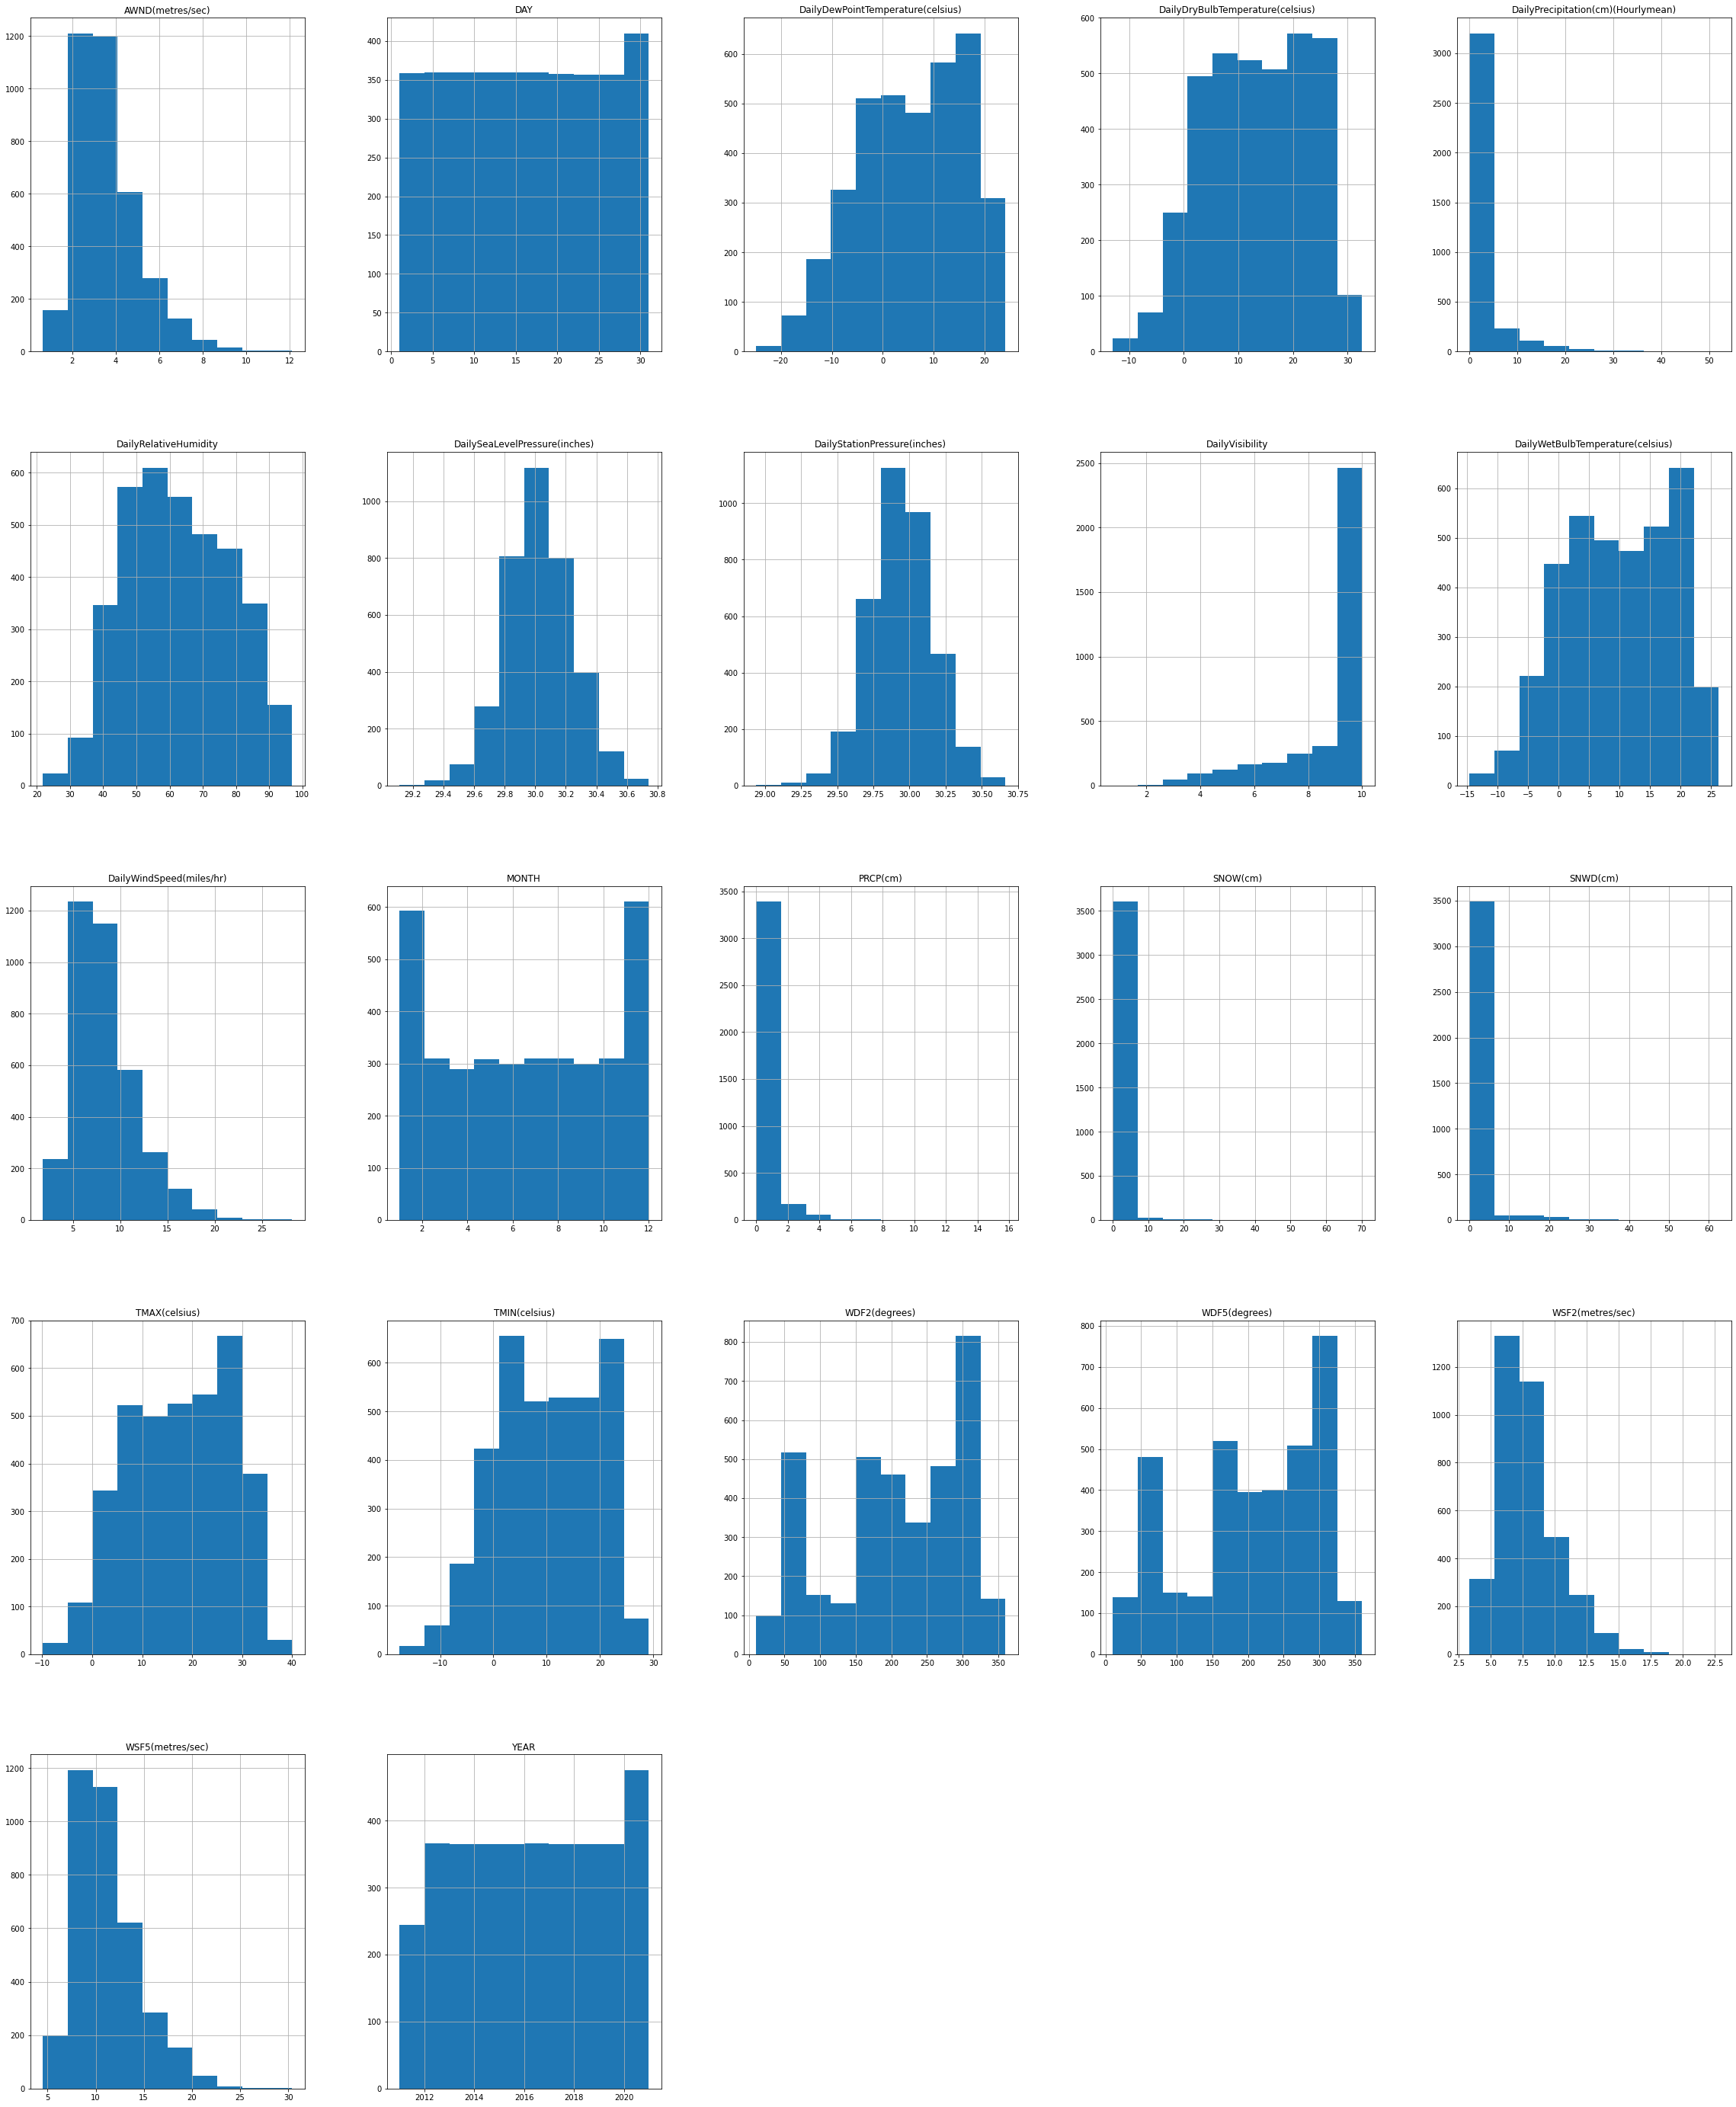

In [ ]:
# Look at the skewness and distribution of the variables by plotting histograms for all variables
fig = plt.figure(figsize = (40,50))
ax = fig.gca()
weather_data.hist(ax = ax)

In [ ]:
# split data into training and validation data sets
train_data, val_data = train_test_split(weather_data, train_size = 0.7, random_state = 173)

In [ ]:
# Print the shape of training and validation sets:
print(train_data.shape)
print(val_data.shape)

(2548, 22)
(1093, 22)


In [ ]:
# separate labels from predictors for training and validation data sets

# Two labels: DailyPrecipitation(cm)(Hourlymean) and DailyDryBulbTemperature(celsius)
# training data
y1_train = train_data["DailyPrecipitation(cm)(Hourlymean)"]
y2_train = train_data["DailyDryBulbTemperature(celsius)"]
x_train = train_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyPrecipitation(cm)(Hourlymean)"])


# validation data
y1_val = val_data["DailyPrecipitation(cm)(Hourlymean)"]
y2_val = val_data["DailyDryBulbTemperature(celsius)"]
x_val = val_data.drop(columns = ["DailyDryBulbTemperature(celsius)", "DailyPrecipitation(cm)(Hourlymean)"])

In [ ]:
# See distribution of y label 
print(y1_train.describe(), "\n")
print(y1_val.describe(), "\n")

count    2548.000000
mean        1.922985
std         4.727525
min         0.000000
25%         0.000000
50%         0.000000
75%         1.069474
max        51.987337
Name: DailyPrecipitation(cm)(Hourlymean), dtype: float64 

count    1093.000000
mean        1.749334
std         4.682318
min         0.000000
25%         0.000000
50%         0.000000
75%         0.793750
max        44.697403
Name: DailyPrecipitation(cm)(Hourlymean), dtype: float64 



In [ ]:
# Run a Decision tree Regression with max_depth = 5 on the Precipitation label.
regp = tree.DecisionTreeRegressor(max_depth=5)
regp = regp.fit(x_train, y1_train)

In [ ]:
regp.feature_importances_

array([1.98421203e-02, 0.00000000e+00, 0.00000000e+00, 3.34993192e-03,
       9.15865500e-01, 0.00000000e+00, 0.00000000e+00, 1.65891341e-02,
       2.95266057e-02, 0.00000000e+00, 7.07718325e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.98165733e-03, 2.82578019e-03,
       1.03708986e-03, 1.09518942e-04, 5.16494328e-03, 0.00000000e+00])

In [ ]:
{var : imp for var, imp in zip(x_train.columns, regp.feature_importances_)}

{'YEAR': 0.019842120325454977,
 'MONTH': 0.0,
 'DAY': 0.0,
 'AWND(metres/sec)': 0.0033499319180524596,
 'PRCP(cm)': 0.9158655000267769,
 'SNOW(cm)': 0.0,
 'SNWD(cm)': 0.0,
 'TMAX(celsius)': 0.016589134063899343,
 'TMIN(celsius)': 0.029526605731814315,
 'WDF2(degrees)': 0.0,
 'WDF5(degrees)': 0.0007077183251203362,
 'WSF2(metres/sec)': 0.0,
 'WSF5(metres/sec)': 0.0,
 'DailyDewPointTemperature(celsius)': 0.0,
 'DailyRelativeHumidity': 0.004981657327196986,
 'DailySeaLevelPressure(inches)': 0.0028257801934972364,
 'DailyStationPressure(inches)': 0.001037089863089812,
 'DailyVisibility': 0.00010951894214718074,
 'DailyWetBulbTemperature(celsius)': 0.00516494328295029,
 'DailyWindSpeed(miles/hr)': 0.0}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train.columns
imp["imp"] = regp.feature_importances_
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)
imp

,var,imp
0,PRCP(cm),0.915866
1,TMIN(celsius),0.029527
2,YEAR,0.019842
3,TMAX(celsius),0.016589
4,DailyWetBulbTemperature(celsius),0.005165
5,DailyRelativeHumidity,0.004982
6,AWND(metres/sec),0.003350
7,DailySeaLevelPressure(inches),0.002826
8,DailyStationPressure(inches),0.001037
9,WDF5(degrees),0.000708


In [ ]:
y1_train_pred = regp.predict(x_train)
y1_train_pred

array([1.51495457e-02, 1.51495457e-02, 1.67504809e+01, ...,
       6.74209136e+00, 1.51495457e-02, 1.51495457e-02])

In [ ]:
y1_val_pred = regp.predict(x_val)
y1_val_pred

array([0.01514955, 0.01514955, 0.01514955, ..., 0.01514955, 0.01514955,
       0.01514955])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred))

RMSE for Training Dataset: 1.1146195109936006
RMSE for Validation Dataset 1.7148194998285058


In [ ]:
# Train the Decision Tree Regression with hyperparameter Tuning for predicting Precipition.

parameters = {"max_depth":range(2, 10), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}
regp1 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_root_mean_squared_error")
regp1.fit(x_train, y1_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(5, 110, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
regp1.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10)

In [ ]:
regp1.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train.columns
imp["imp"] = regp1.best_estimator_.feature_importances_
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)
imp

,var,imp
0,PRCP(cm),0.914291
1,TMIN(celsius),0.029472
2,YEAR,0.019346
3,TMAX(celsius),0.016812
4,DailyWetBulbTemperature(celsius),0.005155
5,AWND(metres/sec),0.004290
6,DailyRelativeHumidity,0.003604
7,WSF2(metres/sec),0.001884
8,DailyStationPressure(inches),0.001064
9,DailySeaLevelPressure(inches),0.001045


In [ ]:
# Get the predicted probabilities on the training set
y1_train_pred1 = regp1.predict(x_train)
y1_train_pred1

array([7.42703558e-03, 7.42703558e-03, 1.44925124e+01, ...,
       6.39415844e+00, 7.42703558e-03, 7.42703558e-03])

In [ ]:
# Get the validation probabilities
y1_val_pred1 = regp1.predict(x_val)
y1_val_pred1

array([0.00742704, 0.00742704, 0.00742704, ..., 0.00742704, 0.00742704,
       0.00742704])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred1))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred1))

RMSE for Training Dataset: 1.0968191201570823
RMSE for Validation Dataset 1.7108832553155695


The RMSE has increased after Hyperparameter Tuning

In [ ]:
x_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)', 'SNOW(cm)',
       'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)', 'WDF2(degrees)',
       'WDF5(degrees)', 'WSF2(metres/sec)', 'WSF5(metres/sec)',
       'DailyDewPointTemperature(celsius)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

In [ ]:
train_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)', 'SNOW(cm)',
       'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)', 'WDF2(degrees)',
       'WDF5(degrees)', 'WSF2(metres/sec)', 'WSF5(metres/sec)',
       'DailyDewPointTemperature(celsius)', 'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

In [ ]:
# Reduce the predictors based on feature importance above 
x_train_prcp2 = train_data.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)", "DailyWindSpeed(miles/hr)", "AWND(metres/sec)",
                                      "WDF5(degrees)", "DailySeaLevelPressure(inches)", "WDF2(degrees)", "YEAR", "SNOW(cm)",
                                      "MONTH", "SNWD(cm)", "PRCP(cm)" ])

x_val_prcp2 = val_data.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)", "DailyWindSpeed(miles/hr)", "AWND(metres/sec)",
                                      "WDF5(degrees)", "DailySeaLevelPressure(inches)", "WDF2(degrees)", "YEAR", "SNOW(cm)",
                                      "MONTH", "SNWD(cm)", "PRCP(cm)" ])

In [ ]:
x_train_prcp2.columns

Index(['DAY', 'TMAX(celsius)', 'TMIN(celsius)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)', 'DailyRelativeHumidity',
       'DailyStationPressure(inches)', 'DailyVisibility',
       'DailyWetBulbTemperature(celsius)'],
      dtype='object')

In [ ]:
x_val_prcp2.columns

Index(['DAY', 'TMAX(celsius)', 'TMIN(celsius)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)', 'DailyRelativeHumidity',
       'DailyStationPressure(inches)', 'DailyVisibility',
       'DailyWetBulbTemperature(celsius)'],
      dtype='object')

In [ ]:
# See distribution
#y1_train = label
#x_train_prcp2 = Training Predictors
#y1_val = label
#x_val_prc2p = Validation predictors

In [ ]:
# Train the Decision Tree Regression with reduced features and hyperparameter Tuning for predicting Precipition.

parameters = {"max_depth":range(2, 10), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}
regp2 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_root_mean_squared_error")
regp2.fit(x_train_prcp2, y1_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(5, 110, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Get the predicted probabilities on the training set
y1_train_pred2 = regp2.predict(x_train_prcp2)
y1_train_pred2

array([1.30041616e-02, 6.17704280e-04, 1.72011273e+01, ...,
       5.47638610e+00, 6.17704280e-04, 6.17704280e-04])

In [ ]:
# Get the validation probabilities
y1_val_pred2 = regp2.predict(x_val_prcp2)
y1_val_pred2

array([0.0006177 , 0.0006177 , 0.01300416, ..., 0.01299698, 0.04729707,
       0.01300416])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred2))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred2))

RMSE for Training Dataset: 2.8849144103783653
RMSE for Validation Dataset 3.989389264965367


Feature Engineering

In [ ]:
x_train_prcp3 = x_train_prcp2
x_val_prcp3 = x_val_prcp2

In [ ]:
print(x_train_prcp3.columns)

Index(['DAY', 'TMAX(celsius)', 'TMIN(celsius)', 'WSF2(metres/sec)',
       'WSF5(metres/sec)', 'DailyDewPointTemperature(celsius)',
       'DailyDryBulbTemperature(celsius)', 'DailyRelativeHumidity',
       'DailyStationPressure(inches)', 'DailyVisibility',
       'DailyWetBulbTemperature(celsius)'],
      dtype='object')


In [ ]:
# predict precipitation dataset
x_train_prcp3["TMIN_low"] = x_train_prcp3["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)
x_val_prcp3["TMIN_low"] = x_val_prcp3["TMIN(celsius)"].map(lambda x: 1 if x <= 0.0 else 0)

x_train_prcp3["TMIN_mid"] = x_train_prcp3["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)
x_val_prcp3["TMIN_mid"] = x_val_prcp3["TMIN(celsius)"].map(lambda x: 1 if 0.0 < x <= 10.0 else 0)

x_train_prcp3["TMIN_high"] = x_train_prcp3["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)
x_val_prcp3["TMIN_high"] = x_val_prcp3["TMIN(celsius)"].map(lambda x: 1 if x >= 10.0 else 0)

In [ ]:
x_train_prcp3 = x_train_prcp3.drop(columns = ["TMIN(celsius)"])
x_val_prcp3 = x_val_prcp3.drop(columns = ["TMIN(celsius)"])

In [ ]:
# predict precipitation dataset
x_train_prcp3["DailyVisibility_low"] = x_train_prcp3["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)
x_val_prcp3["DailyVisibility_low"] =x_val_prcp3["DailyVisibility"].map(lambda x: 1 if x <= 6.88 else 0)

x_train_prcp3["DailyVisibility_mid"] = x_train_prcp3["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)
x_val_prcp3["DailyVisibility_mid"] = x_val_prcp3["DailyVisibility"].map(lambda x: 1 if x >= 6.88 else 0)

In [ ]:
# DailyVisibility*DailyRelativeHumidity
x_train_prcp3["Visibility_Humidity_interaction"] = x_train_prcp3["DailyVisibility"]*x_train_prcp3["DailyRelativeHumidity"]
x_val_prcp3["Visibility_Humidity_interaction"] = x_val_prcp3["DailyVisibility"]*x_val_prcp3["DailyRelativeHumidity"]


x_train_prcp3 = x_train_prcp3.drop(columns = ["DailyVisibility"])
x_val_prcp3 = x_val_prcp3.drop(columns = ["DailyVisibility"])

x_train_prcp3 = x_train_prcp3.drop(columns = ["DailyRelativeHumidity"])
x_val_prcp3 = x_val_prcp3.drop(columns = ["DailyRelativeHumidity"])

In [ ]:
# Train the Decision Tree Regression with reduced features and hyperparameter Tuning for predicting Precipition.

parameters = {"max_depth":range(2, 10), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}
regp3 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_root_mean_squared_error")
regp3.fit(x_train_prcp3, y1_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(5, 110, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# best parameters

regp3.best_params_

{'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 90}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train_prcp3.columns
imp["imp"] = regp3.best_estimator_.feature_importances_
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)
imp

,var,imp
0,DailyVisibility_mid,0.558687
1,DailyDewPointTemperature(celsius),0.212131
2,DailyStationPressure(inches),0.131786
3,WSF2(metres/sec),0.043556
4,DailyDryBulbTemperature(celsius),0.035784
5,WSF5(metres/sec),0.009594
6,Visibility_Humidity_interaction,0.008348
7,TMAX(celsius),0.000115
8,DAY,0.000000
9,DailyWetBulbTemperature(celsius),0.000000


In [ ]:
# Get the predicted probabilities on the training set
y1_train_pred3 = regp3.predict(x_train_prcp3)
y1_train_pred3

array([2.08310062, 0.0075358 , 6.66154329, ..., 1.37836585, 0.0519344 ,
       0.15047328])

In [ ]:
# Get the validation probabilities
y1_val_pred3 = regp3.predict(x_val_prcp3)
y1_val_pred3

array([0.0075358 , 0.97717506, 1.27674141, ..., 2.08310062, 2.08310062,
       1.27674141])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred3))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred3))

RMSE for Training Dataset: 3.4861706739514995
RMSE for Validation Dataset 4.050208201796241


Feature Engineering - Add Rolling Average for 1 Week

In [ ]:
y1_train_df = pd.DataFrame(y1_train)
y1_val_df = pd.DataFrame(y1_val) 

y1_train

2681     0.000000
3599     0.000000
1157    11.737879
397     11.430000
1853     0.000000
          ...    
608      0.000000
2829     2.794000
3531     7.333226
1564     0.000000
2277     0.000000
Name: DailyPrecipitation(cm)(Hourlymean), Length: 2548, dtype: float64

In [ ]:
x_train_prcp2["DailyPrcp_SMA(1W)"] = y1_train_df["DailyPrecipitation(cm)(Hourlymean)"].rolling(7, min_periods = 1).mean()
x_val_prcp2["DailyPrcp_SMA(1W)"] = y1_val_df["DailyPrecipitation(cm)(Hourlymean)"].rolling(7, min_periods = 1).mean()

x_train_prcp2

,DAY,TMAX(celsius),TMIN(celsius),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyRelativeHumidity,DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_low,TMIN_mid,TMIN_high,DailyPrcp_SMA(1W)
2681,3,33.05,24.45,5.60,7.35,22.555556,27.914530,73.753846,30.138769,9.992615,24.145299,0,0,1,0.000000
3599,9,17.25,5.60,8.25,11.60,-6.547619,10.863095,29.678571,30.240714,9.991429,4.146825,0,1,0,0.000000
1157,2,32.80,22.20,9.60,14.05,21.370370,25.985185,77.066667,29.805733,7.247600,22.874074,0,0,1,3.912626
397,2,24.45,16.95,8.05,11.60,14.942280,19.487734,78.870130,29.661905,6.923247,16.878307,0,0,1,5.791970
1853,28,33.30,22.25,7.40,10.75,18.274854,27.183236,59.035088,30.015088,9.061754,21.354776,0,0,1,4.633576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,30,1.65,-1.65,13.40,19.65,-8.266284,0.000000,54.913793,29.815517,9.991724,-2.672414,1,0,0,2.522322
2829,29,6.40,-3.80,8.90,11.60,-1.941098,2.061580,75.530120,29.809518,9.118434,0.542169,1,0,0,2.921465
3531,31,9.45,2.75,8.05,10.95,1.435185,6.913580,69.416667,30.042639,7.919306,4.660494,0,1,0,2.823578
1564,13,28.30,20.00,5.40,7.15,11.378968,24.305556,46.125000,29.947857,9.991429,16.785714,0,0,1,2.816019


In [ ]:
x_train_prcp2.head()

,DAY,TMAX(celsius),TMIN(celsius),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyRelativeHumidity,DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),TMIN_low,TMIN_mid,TMIN_high,DailyPrcp_SMA(1W)
2681,3,33.05,24.45,5.60,7.35,22.555556,27.914530,73.753846,30.138769,9.992615,24.145299,0,0,1,0.000000
3599,9,17.25,5.60,8.25,11.60,-6.547619,10.863095,29.678571,30.240714,9.991429,4.146825,0,1,0,0.000000
1157,2,32.80,22.20,9.60,14.05,21.370370,25.985185,77.066667,29.805733,7.247600,22.874074,0,0,1,3.912626
397,2,24.45,16.95,8.05,11.60,14.942280,19.487734,78.870130,29.661905,6.923247,16.878307,0,0,1,5.791970
1853,28,33.30,22.25,7.40,10.75,18.274854,27.183236,59.035088,30.015088,9.061754,21.354776,0,0,1,4.633576


In [ ]:
# Train the Decision Tree Regression with reduced features and hyperparameter Tuning for predicting Precipition.

parameters = {"max_depth":range(2, 10), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}
regp4 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_root_mean_squared_error")
regp4.fit(x_train_prcp2, y1_train)


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(5, 110, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# best parameters

regp4.best_params_

{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 25}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train_prcp2.columns
imp["imp"] = regp4.best_estimator_.feature_importances_
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

imp

,var,imp
0,DailyVisibility,0.516949
1,DailyPrcp_SMA(1W),0.323095
2,DailyDewPointTemperature(celsius),0.093045
3,DailyRelativeHumidity,0.062282
4,WSF5(metres/sec),0.003709
5,DailyStationPressure(inches),0.000920
6,DAY,0.000000
7,TMAX(celsius),0.000000
8,TMIN(celsius),0.000000
9,WSF2(metres/sec),0.000000


In [ ]:
# Get the predicted probabilities on the training set
y1_train_pred4 = regp4.predict(x_train_prcp2)
y1_train_pred4

array([8.23047048e-03, 8.23047048e-03, 1.24869399e+01, ...,
       5.94051644e+00, 8.23047048e-03, 8.23047048e-03])

In [ ]:
# Get the validation probabilities
y1_val_pred4 = regp4.predict(x_val_prcp2)
y1_val_pred4

array([0.00823047, 0.00823047, 0.00823047, ..., 0.3713913 , 0.00823047,
       0.00823047])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train, y1_train_pred4))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val, y1_val_pred4))

RMSE for Training Dataset: 2.8329157117527726
RMSE for Validation Dataset 2.9600148495378855


In [ ]:
# look at the actual and predicted values on the validation set.
df = pd.DataFrame({'Real Values':y1_val, 'Predicted Values':y1_val_pred4})
df.head(25)

,Real Values,Predicted Values
2059,0.000000,0.008230
1624,0.000000,0.008230
3508,0.000000,0.008230
2282,0.000000,0.008230
1265,0.000000,0.008230
383,0.000000,0.008230
1732,0.000000,0.008230
717,0.103673,0.490968
1310,1.648772,0.490968
1529,5.170714,5.431952


Feature Engineering - Add Lagged Variable for 1 Day and 1 Week

In [ ]:
x_train_prcp4 = pd.concat([y1_train.shift(1), x_train_prcp3], axis = 1)
x_train_prcp4 = x_train_prcp4.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-1'}, axis=1)

x_train_prcp4 = pd.concat([y1_train.shift(7), x_train_prcp3], axis = 1)
x_train_prcp4 = x_train_prcp4.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-7'}, axis=1)


x_val_prcp4 = pd.concat([y1_val.shift(1), x_val_prcp3], axis = 1)
x_val_prcp4 = x_val_prcp4.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-1'}, axis=1)

x_val_prcp4 = pd.concat([y1_val.shift(7), x_val_prcp3], axis = 1)
x_val_prcp4 = x_val_prcp4.rename({"DailyPrecipitation(cm)(Hourlymean)": 'Prcp-7'}, axis=1)

x_val_prcp4.head()

,Prcp-7,DAY,TMAX(celsius),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyStationPressure(inches),DailyWetBulbTemperature(celsius),TMIN_low,TMIN_mid,TMIN_high,DailyVisibility_low,DailyVisibility_mid,Visibility_Humidity_interaction
2059,NaN,20,1.40,7.15,10.05,-13.154762,-1.934524,30.371964,-5.109127,1,0,0,0,1,429.809847
1624,NaN,12,24.70,6.05,8.70,8.988095,18.115079,29.722321,13.154762,0,0,1,0,1,571.652449
3508,NaN,8,2.75,8.75,11.60,-6.779514,0.850694,29.680937,-1.762153,1,0,0,0,1,571.655854
2282,NaN,31,31.40,5.35,7.20,14.960317,25.555556,29.958750,19.027778,0,0,1,0,1,526.691020
1265,NaN,18,21.10,8.50,11.65,9.236111,17.003968,29.543571,12.787698,0,0,1,0,1,614.621339


In [ ]:
# remove first 7 rows
x_train_prcp4 = x_train_prcp4.iloc[7:len(x_train_prcp4)]
x_val_prcp4 = x_val_prcp4.iloc[7:len(x_val_prcp4)]

y1_train2 = y1_train.iloc[7:len(y1_train)]
y1_val2 = y1_val.iloc[7:len(y1_val)]

x_train_prcp4.head()

,Prcp-7,DAY,TMAX(celsius),WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyStationPressure(inches),DailyWetBulbTemperature(celsius),TMIN_low,TMIN_mid,TMIN_high,DailyVisibility_low,DailyVisibility_mid,Visibility_Humidity_interaction
2842,0.000000,11,3.05,6.30,8.50,-7.916667,1.200397,30.233214,-1.815476,1,0,0,0,1,518.625714
2125,0.000000,24,21.10,8.75,11.85,10.885122,16.054614,29.813220,13.173258,0,0,1,0,1,723.942155
1687,11.737879,14,18.60,6.70,9.15,11.427015,13.867102,29.725098,12.532680,0,0,1,1,0,329.373772
1759,11.430000,24,15.85,13.85,20.55,6.213235,7.569444,29.681912,6.968954,0,1,0,1,0,247.912208
3114,0.000000,10,10.85,6.50,9.15,-3.224206,8.035714,29.989107,3.571429,0,1,0,0,1,455.145255


In [ ]:
# Train the Decision Tree Regression again with engineered features and hyperparameter Tuning for predicting Precipition.
parameters = {"max_depth":range(2, 10), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(5, 110, 5)}
regp5 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_root_mean_squared_error")
regp5.fit(x_train_prcp4, y1_train2)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(5, 55, 5),
                         'min_samples_split': range(5, 110, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# best parameters
regp5.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 105}

In [ ]:
imp = pd.DataFrame()
imp["var"] = x_train_prcp4.columns
imp["imp"] = regp5.best_estimator_.feature_importances_
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)
imp

,var,imp
0,DailyVisibility_low,0.576522
1,DailyDewPointTemperature(celsius),0.219580
2,WSF5(metres/sec),0.119226
3,WSF2(metres/sec),0.029765
4,DailyDryBulbTemperature(celsius),0.023373
5,DailyStationPressure(inches),0.023018
6,Visibility_Humidity_interaction,0.008517
7,Prcp-7,0.000000
8,DAY,0.000000
9,TMAX(celsius),0.000000


In [ ]:
# Get the predicted probabilities on the training set
y1_train_pred5 = regp5.predict(x_train_prcp4)
y1_train_pred5

array([0.05878757, 1.46747602, 7.77767506, ..., 1.46747602, 0.05878757,
       0.42119891])

In [ ]:
# Get the validation probabilities
y1_val_pred5 = regp5.predict(x_val_prcp4)
y1_val_pred5

array([1.46747602, 1.46747602, 3.51153475, ..., 2.29736156, 2.29736156,
       1.27674141])

In [ ]:
# get rmse for training and validation set

# training set
print("RMSE for Training Dataset:", eval_measures.rmse(y1_train2, y1_train_pred5))

# validation set
print("RMSE for Validation Dataset", eval_measures.rmse(y1_val2, y1_val_pred5))

RMSE for Training Dataset: 3.5218132213751776
RMSE for Validation Dataset 3.911680043854125
